In [37]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdMolDescriptors as rdescriptors

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
import csv
with open('VDR_IC50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter = ";")
    rawdata = [x for x in reader]
table = pd.DataFrame(rawdata)
table = table[['Molecule ChEMBL ID' , 'Molecular Weight', 'AlogP',  'Smiles','Standard Type',]]
table.head()

,Molecule ChEMBL ID,Molecular Weight,AlogP,Smiles,Standard Type
0,CHEMBL385265,540.79,6.30,C=C1/C(=C\C=C2/CCC[C@@]3(C)[C@H]2CC[C@@H]3[C@H...,IC50
1,CHEMBL213868,454.65,5.66,C=C1/C(=C\C=C2/CCC[C@@]3(C)[C@H]2CC[C@@H]3[C@H...,IC50
2,CHEMBL1551,392.58,4.48,C[C@H](CCC(=O)O)[C@H]1CC[C@H]2[C@@H]3[C@@H](O)...,IC50
3,CHEMBL442191,416.65,5.70,C=C1/C(=C\C=C2/CCC[C@@]3(C)[C@H]2CC[C@@H]3[C@@...,IC50
4,CHEMBL442191,416.65,5.70,C=C1/C(=C\C=C2/CCC[C@@]3(C)[C@H]2CC[C@@H]3[C@@...,IC50


In [3]:
mtor_ligands = [Chem.MolFromSmiles(m) for m in table['Smiles']]

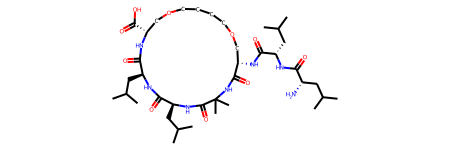

In [4]:
mtor_ligands[99]

In [5]:
Chem.GetSSSR(mtor_ligands[99])

1

In [6]:
Chem.CalcNumRotatableBonds(mtor_ligands[99])

13

In [7]:
mtor_ligands[99].GetNumHeavyAtoms()

55

In [8]:
# hydrogen bond acceptors / donors
rdescriptors.CalcNumLipinskiHBA(mtor_ligands[99]), rdescriptors.CalcNumLipinskiHBD(mtor_ligands[99])

(17, 9)

In [9]:
rdescriptors.CalcExactMolWt(mtor_ligands[99])

783.510591408

In [10]:
rdescriptors.CalcTPSA(mtor_ligands[99])

256.38

In [11]:
Descriptors.MolLogP(mtor_ligands[99])

0.7285000000000064

In [12]:
mtor_rings = [Chem.GetSSSR(l) for l in mtor_ligands]
mtor_rotatable = [Chem.CalcNumRotatableBonds(l) for l in mtor_ligands]
mtor_atomcount = [l.GetNumHeavyAtoms() for l in mtor_ligands]
mtor_hba = [rdescriptors.CalcNumLipinskiHBA(l) for l in mtor_ligands]
mtor_hbd = [rdescriptors.CalcNumLipinskiHBD(l) for l in mtor_ligands]
mtor_molwt = [rdescriptors.CalcExactMolWt(l) for l in mtor_ligands]
mtor_tpsa = [rdescriptors.CalcTPSA(l) for l in mtor_ligands]
mtor_logp = [Descriptors.MolLogP(l) for l in mtor_ligands]

In [13]:
sns.set(rc={'figure.figsize':(11.7, 11.7)})

In [14]:
df = pd.DataFrame(data={'set':'mtor', 'rings': mtor_rings,
                        'rotatable': mtor_rotatable, 'atoms': mtor_atomcount,
                        'hba': mtor_hba, 'hbd': mtor_hbd, 'molwt': mtor_molwt,
                        'tpsa': mtor_tpsa, 'logp': mtor_logp})
df

,set,rings,rotatable,atoms,hba,hbd,molwt,tpsa,logp
0,mtor,4,9,39,5,3,540.381475,86.99,6.29610
1,mtor,4,4,33,4,2,454.308310,66.76,5.66140
2,mtor,4,4,28,4,3,392.292660,77.76,4.47790
3,mtor,3,6,30,3,3,416.329045,60.69,5.70470
4,mtor,3,6,30,3,3,416.329045,60.69,5.70470
...,...,...,...,...,...,...,...,...,...
638,mtor,3,8,28,6,0,381.157623,70.79,4.34322
639,mtor,3,7,27,6,0,367.141973,70.79,3.95312
640,mtor,3,6,30,3,3,416.329045,60.69,5.70470
641,mtor,2,18,39,6,2,541.424343,66.73,6.70422


<AxesSubplot:>

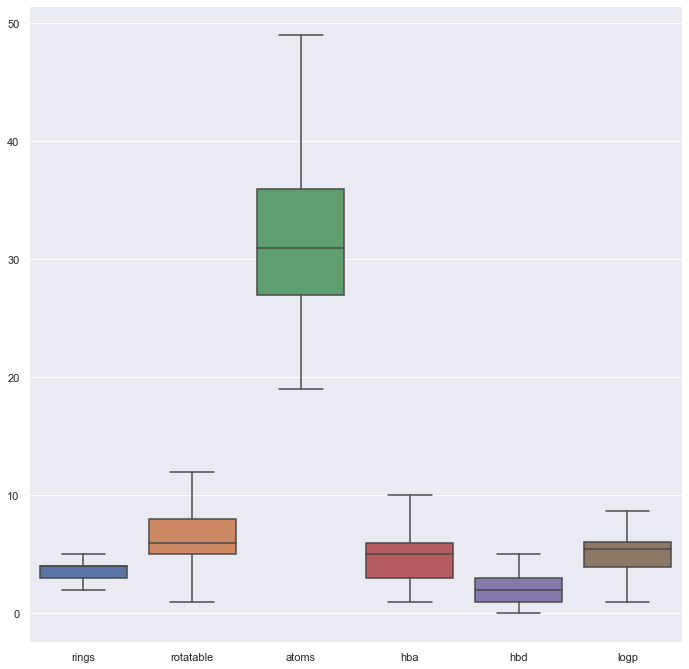

In [15]:
sns.boxplot(data=df[['rings', 'rotatable', 'atoms', 'hba', 'hbd', 'logp']], showfliers=False)

<AxesSubplot:>

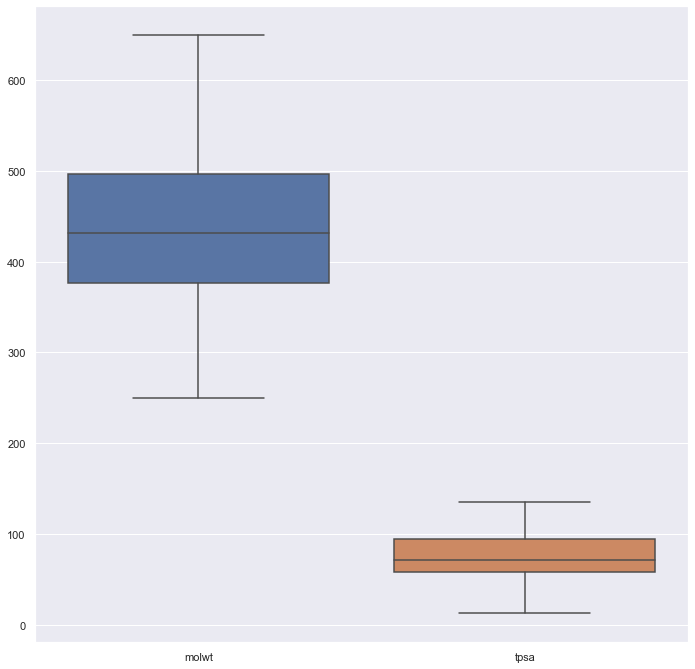

In [16]:
sns.boxplot(data=df[['molwt', 'tpsa']], showfliers = False)

<AxesSubplot:>

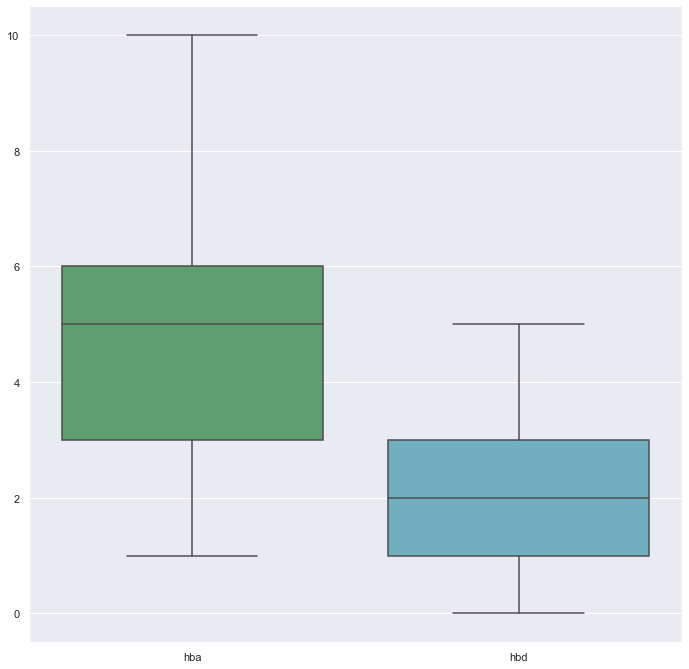

In [26]:
sns.boxplot(data=df[['hba', 'hbd']], showfliers = False,palette={'b','g','c','r','m','y'})

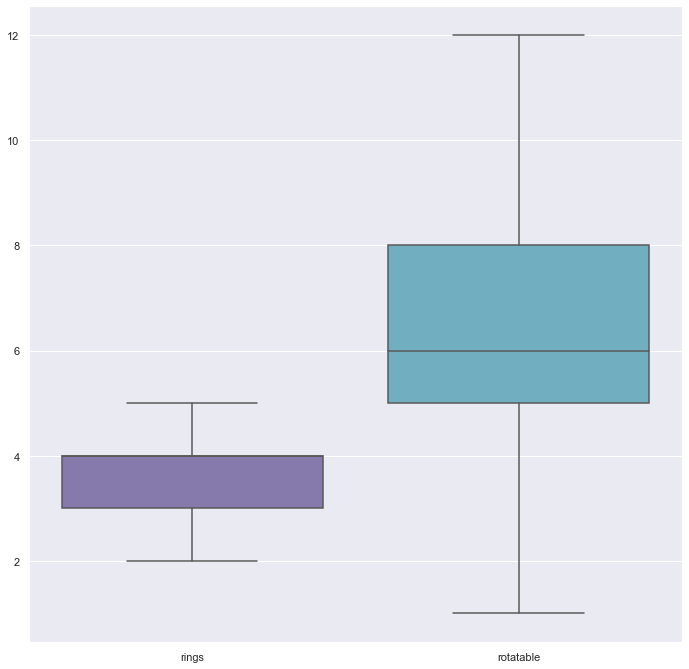

In [65]:
ax = sns.boxplot(data=df[['rings', 'rotatable']], showfliers = False, palette={'m','c'})



In [22]:
suppl = Chem.SDMolSupplier('cdd2021/data/drugbank.sdf')
drugs = [m for m in suppl if m]
len(drugs)

RDKit ERROR: [09:14:41] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [09:14:41] ERROR: Could not sanitize molecule ending on line 20009
RDKit ERROR: [09:14:41] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [09:14:42] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [09:14:42] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [09:14:42] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [09:14:42] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [09:14:42] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [09:14:42] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [09:14:42] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
RDKit ERROR: 
RDKit ERROR: [09:14:42] ERROR: Could not sanitize molecule ending on line 261581
RDKit ERROR

RDKit ERROR: [09:14:42] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 12
RDKit ERROR: 
RDKit ERROR: [09:14:42] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [09:14:42] ERROR: Could not sanitize molecule ending on line 499305
RDKit ERROR: [09:14:42] ERROR: Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [09:14:42] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [09:14:42] ERROR: Could not sanitize molecule ending on line 503342
RDKit ERROR: [09:14:42] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [09:14:42] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [09:14:42] ERROR: Could not sanitize molecule ending on line 508068
RDKit ERROR: [09:14:42] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [09:14:42] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 

7113

In [29]:
drugbank_rings = [Chem.GetSSSR(l) for l in drugs]
drugbank_rotatable = [Chem.CalcNumRotatableBonds(l) for l in drugs]
drugbank_atomcount = [l.GetNumHeavyAtoms() for l in drugs]
drugbank_hba = [rdescriptors.CalcNumLipinskiHBA(l) for l in drugs]
drugbank_hbd = [rdescriptors.CalcNumLipinskiHBD(l) for l in drugs]
drugbank_molwt = [rdescriptors.CalcExactMolWt(l) for l in drugs]
drugbank_tpsa = [rdescriptors.CalcTPSA(l) for l in drugs]
drugbank_logp = [Descriptors.MolLogP(l) for l in drugs]

In [30]:
df_drugbank = pd.DataFrame(data={'set':'drugs', 'rings': drugbank_rings,
                                 'rotatable': drugbank_rotatable, 'atoms': drugbank_atomcount,
                                 'hba': drugbank_hba, 'hbd': drugbank_hbd, 'molwt': drugbank_molwt,
                                 'tpsa': drugbank_tpsa, 'logp': drugbank_logp})
df_drugbank

,set,rings,rotatable,atoms,hba,hbd,molwt,tpsa,logp
0,drugs,6,66,155,57,31,2178.985813,901.57,-8.11643
1,drugs,6,31,91,32,20,1268.641439,495.89,-3.10570
2,drugs,4,19,74,26,18,1068.426955,435.41,-4.13203
3,drugs,6,38,102,31,20,1429.669818,495.67,-0.50613
4,drugs,1,15,85,23,5,1201.841368,278.80,3.26900
...,...,...,...,...,...,...,...,...,...
7108,drugs,1,0,8,1,1,128.002892,20.23,2.04560
7109,drugs,3,3,24,9,5,340.079432,149.82,-1.32270
7110,drugs,6,14,79,27,13,1114.554641,403.10,1.54710
7111,drugs,0,13,21,5,0,330.147689,83.50,-0.00030


In [31]:
joint_df = pd.concat([df, df_drugbank], ignore_index=True)
joint_df

,set,rings,rotatable,atoms,hba,hbd,molwt,tpsa,logp
0,mtor,4,9,39,5,3,540.381475,86.99,6.2961
1,mtor,4,4,33,4,2,454.308310,66.76,5.6614
2,mtor,4,4,28,4,3,392.292660,77.76,4.4779
3,mtor,3,6,30,3,3,416.329045,60.69,5.7047
4,mtor,3,6,30,3,3,416.329045,60.69,5.7047
...,...,...,...,...,...,...,...,...,...
7751,drugs,1,0,8,1,1,128.002892,20.23,2.0456
7752,drugs,3,3,24,9,5,340.079432,149.82,-1.3227
7753,drugs,6,14,79,27,13,1114.554641,403.10,1.5471
7754,drugs,0,13,21,5,0,330.147689,83.50,-0.0003


In [32]:
melted_df = pd.melt(joint_df, id_vars=['set'], value_vars=['rings', 'rotatable', 'atoms', 'hba', 'hbd', 'logp'])
melted_df

#chapu ze transformujeme data pro podobu vhodnejsi pro pocitac, ale jak to pak budeme pouzivat
#jak casto to vubec pouzivaji

,set,variable,value
0,mtor,rings,4.0000
1,mtor,rings,4.0000
2,mtor,rings,4.0000
3,mtor,rings,3.0000
4,mtor,rings,3.0000
...,...,...,...
46531,drugs,logp,2.0456
46532,drugs,logp,-1.3227
46533,drugs,logp,1.5471
46534,drugs,logp,-0.0003


<AxesSubplot:xlabel='variable', ylabel='value'>

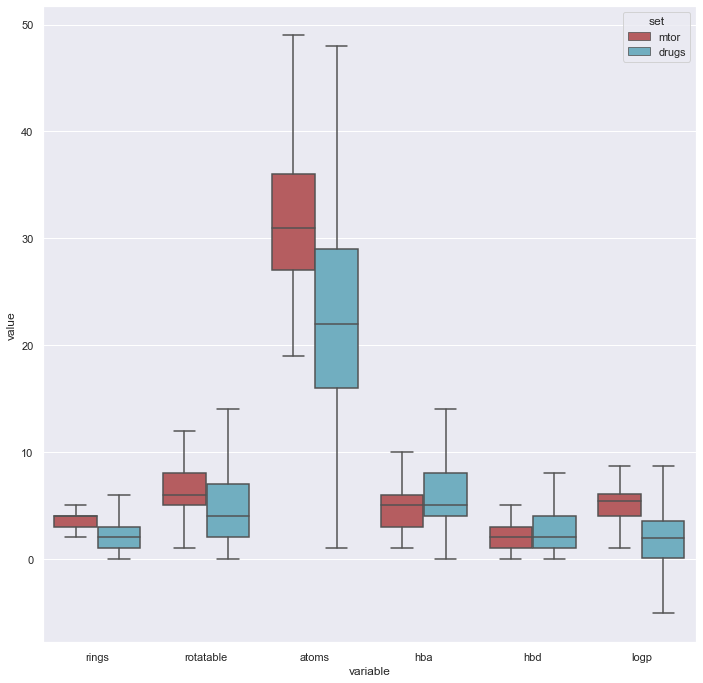

In [43]:
sns.boxplot(y='value', x='variable', hue='set', data=melted_df, showfliers=False,palette={'c','r'})


In [46]:
melted_df2 = pd.melt(joint_df, id_vars=['set'], value_vars=['molwt', 'tpsa'])
melted_df2

,set,variable,value
0,mtor,molwt,540.381475
1,mtor,molwt,454.308310
2,mtor,molwt,392.292660
3,mtor,molwt,416.329045
4,mtor,molwt,416.329045
...,...,...,...
15507,drugs,tpsa,20.230000
15508,drugs,tpsa,149.820000
15509,drugs,tpsa,403.100000
15510,drugs,tpsa,83.500000


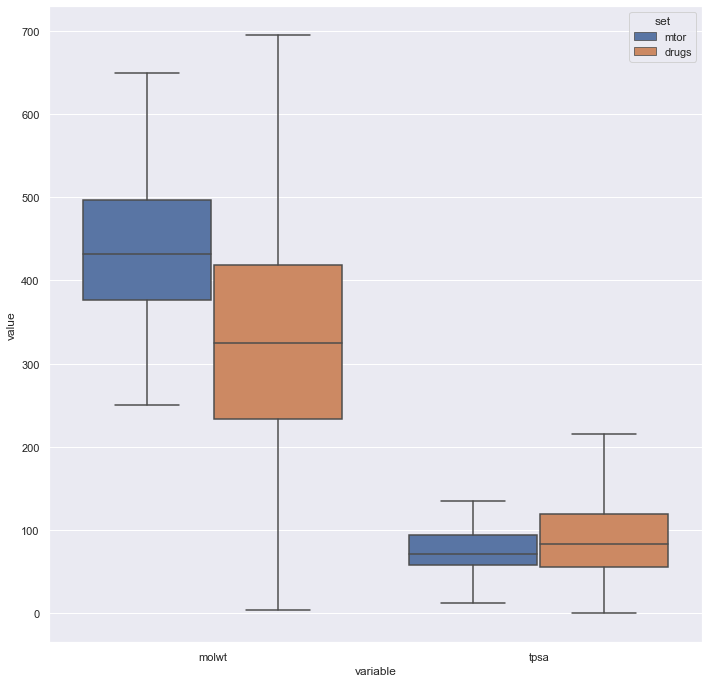

In [61]:
ax = sns.boxplot(y='value', x='variable', hue='set', data=melted_df2, showfliers=False)


In [61]:
mtor_heteroatoms_ratio = [rdescriptors.CalcNumHeteroatoms(l)/l.GetNumHeavyAtoms() for l in mtor_ligands]
drugbank_heteroatoms_ratio = [rdescriptors.CalcNumHeteroatoms(l)/l.GetNumHeavyAtoms() for l in drugs]

mtor_heterocycles_ratio = [rdescriptors.CalcNumHeterocycles(l)/rdescriptors.CalcNumRings(l)
                           for l in mtor_ligands if rdescriptors.CalcNumRings(l)]
drugbank_heterocycles_ratio = [rdescriptors.CalcNumHeterocycles(l)/rdescriptors.CalcNumRings(l)
                               for l in drugs if rdescriptors.CalcNumRings(l)]

In [62]:
df = pd.DataFrame(data=[{'set': 'mtor', 'variable': 'heteroatom_ratio', 'value': x}
                        for x in mtor_heteroatoms_ratio])
df = df.append(pd.DataFrame(data=[{'set': 'drugbank', 'variable': 'heteroatom_ratio', 'value': x}
                                  for x in drugbank_heteroatoms_ratio]), ignore_index=True)
df = df.append(pd.DataFrame(data=[{'set': 'mtor', 'variable': 'heterocycle_ratio', 'value': x}
                                  for x in mtor_heterocycles_ratio]), ignore_index=True)
df = df.append(pd.DataFrame(data=[{'set': 'drugbank', 'variable': 'heterocycle_ratio', 'value': x}
                                  for x in drugbank_heterocycles_ratio]), ignore_index=True)
df

,set,variable,value
0,mtor,heteroatom_ratio,0.128205
1,mtor,heteroatom_ratio,0.121212
2,mtor,heteroatom_ratio,0.142857
3,mtor,heteroatom_ratio,0.100000
4,mtor,heteroatom_ratio,0.100000
...,...,...,...
14524,drugbank,heterocycle_ratio,0.000000
14525,drugbank,heterocycle_ratio,0.000000
14526,drugbank,heterocycle_ratio,0.666667
14527,drugbank,heterocycle_ratio,0.500000


<AxesSubplot:xlabel='variable', ylabel='value'>

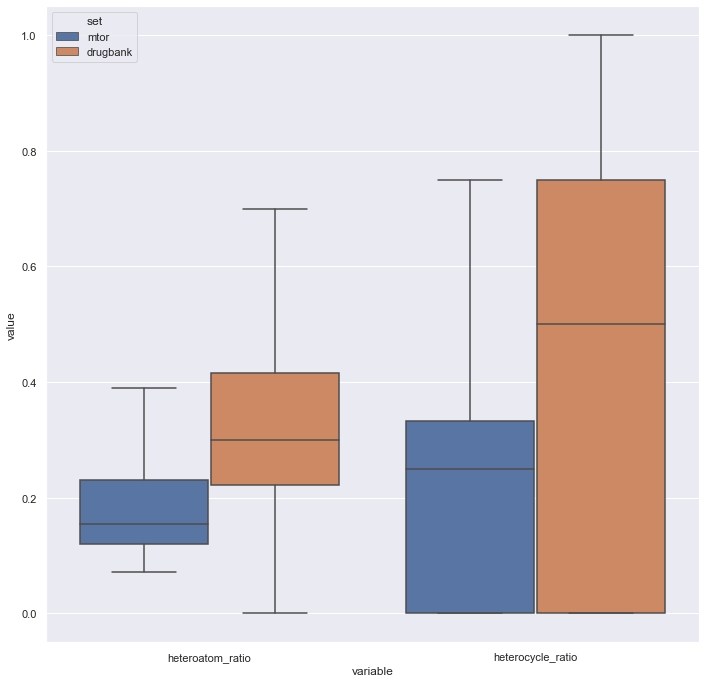

In [63]:
sns.boxplot(y='value', x='variable', hue='set', data=df, showfliers=False)